# 결측치

Missing Value

데이터를 수집해서 처리하다보면 결측치를 만나게 됩니다. 결측치가 포함된 모델은 성능에 안 좋은 영향을 미칠 수 있기 때문에 전처리시에 처리하게 됩니다. 보통은 프로젝트내 도메인 전문가의 조언대로 처리되지만, 없을 경우는 결측치의 원인과 종류에 따라 그 처리 방법을 각기 달리 해서 처리합니다. 

## Missing Value의 종류
Missing Completely at Random (MCAR)
* 완전하게 랜덤으로 결측치가 나타나는 경우입니다.
* 완전하게 랜덤으로 나타난다면, 데이터가 큰 경우 랜덤 샘플링을 통해 완전한 데이터를 만들수 있게 됩니다.


Missing at Random (MAR)
* 결측치가 특정 변수와 관련되어 일어나지만 그 변수의 값과는 관계가 없는 경우입니다.
* 예: 결측치가 발견되었는데, 데이터 수집 과정에서 설문 응답자가 다음 페이지가 있는지 모르고 응답을 종료한 경우 


Missing not at Random (MNAR)
* 결측치의 값과 결측 이유가 관련이 있는 경우입니다. 
* 예: 결측치가 발견되었는데, 데이터 수집 과정에서 설문 응답자가 해당 수집 변수에 대해 응답을 꺼려하여 응답하지 않은 경우

## Missing Value 처리 기준

'Multivariate Data Analysis' Pearson Education 책에서는 아래 방법을 추천하고 있습니다.

* 결측치 비율 10% 이하: 어떤 Imputation 방법도 상관 없음
* 결측치 비율 10% ~ 20%: MCAR일 경우 Replace, Regression 방법 추천, MAR 일 경우 모델기반 방법 추천
* 결측치 비율 20% 이상: MCAR일 경우 Regression 방법 추천, MAR 일 경우 모델기반 방법 추천

추가적으로 결측치 비율 10% 이하이고, 데이터가 빅데이터인 경우는 Deletion 방법도 고려해 볼 수 있습니다.

In [1]:
import warnings # 경고 출력 끄기 
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=range(5), columns=['one', 'two', 'three'])
df.iloc[2:, 1] = np.nan
df.iat[-1, 0] = np.inf
print(df, "\n")

# 일반적으로 isna(), isnull() 함수를 이용, NaN 값 외 다른 결측치 값은 체크하지 못함
print(df.isna().sum(), "\n")

# 결측치 값에 대해 정의가 되어 있다면, 해당 값을 찾기 위해서 isin() 함수를 이용
missing_values = [np.nan, np.inf, -np.inf, 0]
print(df.isin(missing_values).sum(), "\n")

# 결측치 비율 구하기
df_missing = pd.DataFrame(df.isin(missing_values).sum(), columns=['missing'])
df_missing["percent"] = df_missing['missing'] / float(len(df.index)) * 100
print(df_missing)

        one       two     three
0  1.871388 -2.563360  0.053417
1  1.442962 -0.430126  1.311010
2  0.465183       NaN  0.267957
3  3.057069       NaN -1.796465
4       inf       NaN -0.710739 

one      0
two      3
three    0
dtype: int64 

one      1
two      3
three    0
dtype: int64 

       missing  percent
one          1     20.0
two          3     60.0
three        0      0.0


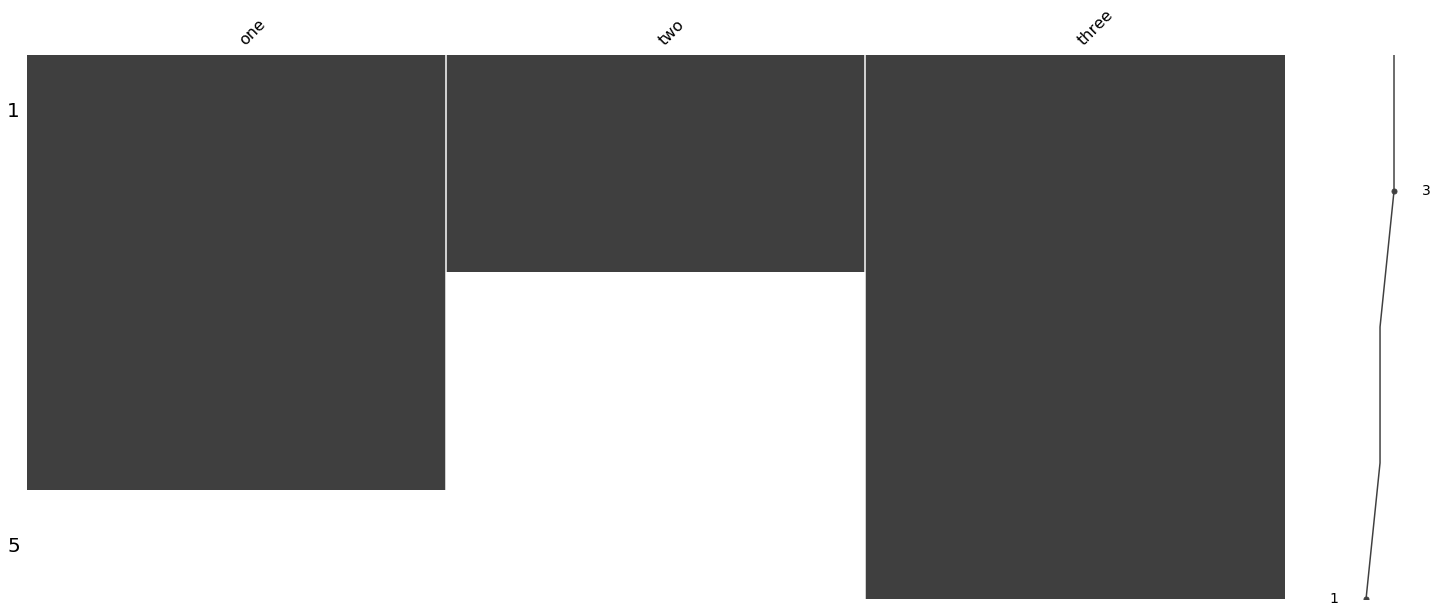

In [2]:
# 결측치 시각화
import missingno as msno

# missingno 또한 NaN 값을 결측치로 다루기 때문에 정의된 결측치 값을 찾아 NaN 으로 치환 후 사용
df_missing = df.isin(missing_values)
df_missing.replace({True: np.nan}, inplace=True)
msno.matrix(df_missing)

## Missing Value 처리 방법

### Deletion
#### Listwise Deletion
결측치가 발생된 행 전체 삭제

In [3]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=range(5), columns=['one', 'two', 'three'])
df.iloc[2:, 1] = np.nan
df.iat[-1, 0] = np.nan
df.iat[-1, 2] = np.nan
print(df, "\n")

print(df.dropna(how='any'))

        one       two     three
0  1.021990  0.947922 -0.224424
1  0.749216  1.314831 -0.405020
2 -0.529924       NaN  3.027018
3  0.830085       NaN  1.484840
4       NaN       NaN       NaN 

        one       two     three
0  1.021990  0.947922 -0.224424
1  0.749216  1.314831 -0.405020


#### Pairwise Deletion
통계에 따라 선택된 결측치만 삭제, 통계적 지식이 필요하고, 주의하지 않으면 오류를 포함할수 있어 잘 사용되지 않음

#### Deleting Columns
결측치가 발생된 열 전체 삭제, 해당 열이 종속 변수와 상관 관계가 없는 경우만 사용

In [4]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=range(5), columns=['one', 'two', 'three'])
df.iloc[:, 1] = np.nan
df.iat[-1, 0] = np.nan
df.iat[-1, 2] = np.nan
print(df, "\n")

print(df.dropna(how='all', axis=1))

        one  two     three
0 -1.024035  NaN -0.798513
1  0.950509  NaN  1.289354
2  1.340670  NaN -0.971474
3 -0.851012  NaN  0.570161
4       NaN  NaN       NaN 

        one     three
0 -1.024035 -0.798513
1  0.950509  1.289354
2  1.340670 -0.971474
3 -0.851012  0.570161
4       NaN       NaN


### Imputation
#### Record Data
##### Continuous Data

In [5]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=range(5), columns=['one', 'two', 'three'])
df.iat[-1, 0] = np.nan
df.iat[-1, 1] = np.nan
df.iloc[2:, 2] = np.nan
print(df, "\n")

# Mean(평균값)으로 채우기
mean = df['one'].mean()
print(f"mean: {mean}")
df['one'].fillna(mean, inplace=True)
print(df,"\n")

# Median(중앙값)으로 채우기
median = df['two'].median()
print(f"median: {median}")
df['two'].fillna(median, inplace=True)
print(df, "\n")

# Constant(상수값)으로 채우기
df['three'].fillna(0, inplace=True)
print(df, "\n")

        one       two     three
0 -0.599206  0.431637  0.251944
1  1.282215  0.168440  0.370718
2  0.546144  0.378908       NaN
3 -0.834689  0.071709       NaN
4       NaN       NaN       NaN 

mean: 0.0986159376704776
        one       two     three
0 -0.599206  0.431637  0.251944
1  1.282215  0.168440  0.370718
2  0.546144  0.378908       NaN
3 -0.834689  0.071709       NaN
4  0.098616       NaN       NaN 

median: 0.27367416999537
        one       two     three
0 -0.599206  0.431637  0.251944
1  1.282215  0.168440  0.370718
2  0.546144  0.378908       NaN
3 -0.834689  0.071709       NaN
4  0.098616  0.273674       NaN 

        one       two     three
0 -0.599206  0.431637  0.251944
1  1.282215  0.168440  0.370718
2  0.546144  0.378908  0.000000
3 -0.834689  0.071709  0.000000
4  0.098616  0.273674  0.000000 



In [6]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=range(5), columns=['one', 'two', 'three'])
df.iat[-1, 0] = np.nan
df.iat[-1, 1] = np.nan
df.iloc[2:, 2] = np.nan
print(df, "\n")

# 모델로 채우기 - MICE
# Multiple Imputation by Chained Equations
# 결측치가 포함된 데이터 입력 받아 몬테카를로 시뮬레이션을 반복하여 결측치를 채워넣는 방법 
# pip install impyute
# https://impyute.readthedocs.io/en/master/
import impyute as impy

df2 = pd.DataFrame(impy.mice(df.values))
df2.columns = df.columns
print(df2, "\n")

# 모델로 채우기 - IterativeImputer 
# pip install fancyimpute
# https://github.com/iskandr/fancyimpute
from fancyimpute import IterativeImputer

df2 = pd.DataFrame(IterativeImputer().fit_transform(df.values))
df2.columns = df.columns
print(df2, "\n")

# 모델로 채우기 - KNN
from fancyimpute import KNN

df2 = pd.DataFrame(KNN(k=3).fit_transform(df.values))
df2.columns = df.columns
print(df2, "\n")


        one       two     three
0 -1.089940  1.442847  0.792487
1 -2.057239 -0.152834  0.181034
2 -0.229568  0.042935       NaN
3 -0.921464  0.284487       NaN
4       NaN       NaN       NaN 

        one       two     three
0 -1.089940  1.442847  0.792487
1 -2.057239 -0.152834  0.181034
2 -0.229568  0.042935  0.546355
3 -0.921464  0.284487  0.496512
4 -1.074553  0.404359  0.504097 



Using TensorFlow backend.


        one       two     three
0 -1.089940  1.442847  0.792487
1 -2.057239 -0.152834  0.181034
2 -0.229568  0.042935  0.546354
3 -0.921464  0.284487  0.496511
4 -1.074553  0.404359  0.504097 

Imputing row 1/5 with 0 missing, elapsed time: 0.000
[KNN] Warning: 3/15 still missing after imputation, replacing with 0
        one       two     three
0 -1.089940  1.442847  0.792487
1 -2.057239 -0.152834  0.181034
2 -0.229568  0.042935  0.520896
3 -0.921464  0.284487  0.498667
4  0.000000  0.000000  0.000000 



##### Categorical Data

In [7]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), index=range(5), columns=['one', 'two', 'three'])
df = df.astype(str)
df.iat[-1, 0] = np.nan
df.iat[-1, 1] = np.nan
df.iloc[2:, 2] = np.nan
print(df, "\n")

# NaN 자체를 하나의 Label 로 다루기
df['one'].fillna(11, inplace=True)
print(df, "\n")

# 최빈도 값으로 채우기
mode = df['two'].mode()[0]
print("mode={}".format(mode))
df['two'].fillna(mode, inplace=True)
print(df, "\n")

   one  two three
0    6    6     4
1    6    4     8
2    1    7   NaN
3    4    0   NaN
4  NaN  NaN   NaN 

  one  two three
0   6    6     4
1   6    4     8
2   1    7   NaN
3   4    0   NaN
4  11  NaN   NaN 

mode=0
  one two three
0   6   6     4
1   6   4     8
2   1   7   NaN
3   4   0   NaN
4  11   0   NaN 



#### Sequence Data
##### No Trend, No Seasonality
이 경우는 기존의 Record Data 와 같은 데이터형태 이므로 Imputation 방법을 활용하면 됩니다.

##### Trend, No Seasonality
데이터에 경향성은 있지만 주기성은 없는 경우는 interpolate(보간법)을 이용합니다. 

In [8]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html

s = pd.Series([0, 1, np.nan, 3])
print(s, "\n")
print(s.interpolate())

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64 

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64


##### Trend, Seasionality

데이터가 경향성과 주기성이 모두 존재하는 경우는 해당 시계열 데이터를 Stationary 하게 만들어 주기적인 변화량을 예측하여 결측치를 채워 넣는 방법을 이용합니다.

사용할 예제는 항공 승객데이터 입니다.

In [9]:
import statsmodels.api as sm

ap = sm.datasets.get_rdataset("AirPassengers")
print(ap.__doc__)

df_ap = ap.data
print(df_ap.info())

print(df_ap.head())

============= ===============
AirPassengers R Documentation
============= ===============

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

   AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

   ## Not run: 
   ## These are quite slow and so not run by example(AirPassengers)

   ## The classic 'airline model', by full ML
   (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                 seasonal = list(order = c(0, 1, 1), period = 12)))
   update(fit, method = "CSS")
   update(fit, x = window(log10(AirPassengers), start = 1954))
   pred <- predict(fit, n.ahead = 24)
   tl <- pred$pred - 1.96 * pred$se
 

항공 승객 데이터의 time 데이터를 보기좋게 datetime 으로 변경하고, 5% 정도의 결측치를 랜덤하게 생성해넣겠습니다. 그래프에 value 와 missing 값을 동시에 plot 하였기에 비어 있는 구간은 value 의 값만 나타나게 됩니다.

          time  value   datetime  missing
0  1949.000000    112 1949-01-01    112.0
1  1949.083333    118 1949-02-01    118.0
2  1949.166667    132 1949-03-01    132.0


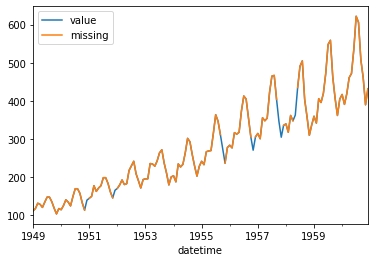

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime, dateutil
import random
import pandas as pd
import numpy as np

# time format: 1.0: year, 1/12: month
def get_datetime(time):
    year = int(time)
    month = int(round(12 * (time - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

def set_nan(val, prob):
    if random.random() < prob:
        return np.nan
    else:
        return val
    
df_ap["datetime"] = df_ap["time"].apply(lambda x: get_datetime(x))
df_ap["missing"] = df_ap["value"].apply(lambda x: set_nan(x, 0.05))
print(df_ap.head(3))

df_ap.plot(x="datetime", y=["value", "missing"])

seasonal_decompose 함수를 이용하여 시계열 데이터를 trend, seasonal, residual 로 분해하여 얻어진 정제된 seasonal 값을 이용하여 결측치 값을 채워 넣습니다.

freq 값은 결측치가 포함된 본 시계열 데이터가 가지고 있는 seasonal 주기에 가까울수록 에러가 적지만, 결측치가 데이터의 앞쪽에 있는 경우는 분해를 못하거나 인덱스 에러가 날 수 있으므로, 점진적으로 늘려가면서 제일 좋은 결과를 사용하면 됩니다.

          time  value   datetime  missing_x  missing_y
0  1949.000000    112 1949-01-01      112.0      112.0
1  1949.083333    118 1949-02-01      118.0      118.0
2  1949.166667    132 1949-03-01      132.0      132.0
3  1949.250000    129 1949-04-01      129.0      129.0
4  1949.333333    121 1949-05-01      121.0      121.0


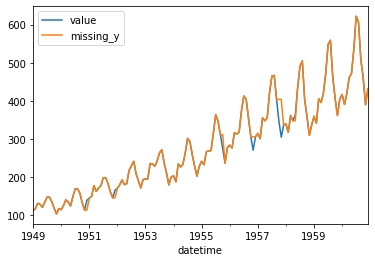

In [11]:
df_dm = df_ap['missing']
df_dm.index = df_ap["datetime"]

freq = 1
ts = df_dm.copy()
for k, v in enumerate(ts):
    if not np.isnan(v):
        continue
    de = sm.tsa.seasonal_decompose(ts[:k].values, model='additive', freq=freq)
    ts[k] = ts[k-1] + de.seasonal[-freq]

df_ap_new = pd.merge(df_ap, ts, on='datetime')
print(df_ap_new.head())

df_ap_new.plot(x="datetime", y=["value", "missing_y"])

